### 0. Download Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.utils import resample
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

In [2]:
coupon = pd.read_excel("http://byungwan.com/class/Coupon_Assignment2.xlsx")
coupon.head()

,CID,Gender,Age,CClass,Discount,Visits,Email,SMS,MStatus,Purchases,Sales
0,1,Male,25,2,Coupon Not Used,1,Opt-in,Opt-in,Married,1,0.5050
1,2,Female,17,2,Coupon Not Used,1,Opt-in,Opt-in,Married,1,0.3300
2,3,Female,38,2,Coupon Not Used,3,Opt-in,Opt-in,Married,1,0.2550
3,4,Female,36,2,Coupon Not Used,6,Opt-in,Opt-in,Single,3,1.8762
4,5,Female,37,2,Coupon Not Used,7,Opt-in,Opt-in,Single,5,6.0940


### 1. Convert categorical to numerical

In [3]:
coupon = pd.get_dummies(coupon, columns= ["Gender", "Discount","Email","SMS","MStatus"], drop_first = True, dtype = int)
coupon.head()

,CID,Age,CClass,Visits,Purchases,Sales,Gender_Male,Discount_Coupon Used,Email_Opt-out,SMS_Opt-out,MStatus_Single
0,1,25,2,1,1,0.5050,1,0,0,0,0
1,2,17,2,1,1,0.3300,0,0,0,0,0
2,3,38,2,3,1,0.2550,0,0,0,0,0
3,4,36,2,6,3,1.8762,0,0,0,0,1
4,5,37,2,7,5,6.0940,0,0,0,0,1


In [4]:
# Build the decision tree model that predicts the customers who are likely to receive and redeem a discount coupon

### 2. Unbalanced data_Up-Sampling

In [5]:
coupon["Discount_Coupon Used"].value_counts()

Discount_Coupon Used
0    927
1     73
Name: count, dtype: int64

In [6]:
coupon0 = coupon[coupon["Discount_Coupon Used"] == 0]

In [7]:
coupon1 = coupon[coupon["Discount_Coupon Used"] == 1]

In [8]:
coupon1_upsampled = resample(coupon1, replace=True, n_samples=927, random_state=0)

In [9]:
coupon1_upsampled["Discount_Coupon Used"].value_counts()

Discount_Coupon Used
1    927
Name: count, dtype: int64

In [10]:
coupon_upsampled = pd.concat([coupon0, coupon1_upsampled], axis=0)

In [11]:
coupon_upsampled["Discount_Coupon Used"].value_counts()

Discount_Coupon Used
0    927
1    927
Name: count, dtype: int64

In [12]:
coupon_upsampled.head()

,CID,Age,CClass,Visits,Purchases,Sales,Gender_Male,Discount_Coupon Used,Email_Opt-out,SMS_Opt-out,MStatus_Single
0,1,25,2,1,1,0.5050,1,0,0,0,0
1,2,17,2,1,1,0.3300,0,0,0,0,0
2,3,38,2,3,1,0.2550,0,0,0,0,0
3,4,36,2,6,3,1.8762,0,0,0,0,1
4,5,37,2,7,5,6.0940,0,0,0,0,1


### 3. Define Y & X

In [13]:
coupon_upsampled.columns.get_loc("Discount_Coupon Used")

7

In [14]:
y = coupon_upsampled.iloc[: , 7]

In [15]:
x = coupon_upsampled.iloc[:, [1,2,3,4,5,6,8,9,10]]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### 4. Decision Tree

In [17]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=5)

In [18]:
dtc_model = dtc.fit(x_train, y_train)

In [19]:
y_pred = dtc_model.predict(x_test)

In [20]:
metrics.accuracy_score(y_test, y_pred)

0.8850987432675045

In [21]:
metrics.confusion_matrix(y_test, y_pred)

array([[231,  51],
       [ 13, 262]])

### 5. Visualization of tree

In [22]:
vars = x.columns.tolist()

In [23]:
y_train.value_counts().index

Index([1, 0], dtype='int64', name='Discount_Coupon Used')

In [24]:
print(dtc_model.classes_)

[0 1]


In [25]:
cn = ["Coupon not used", "Coupon used"]
cn

['Coupon not used', 'Coupon used']

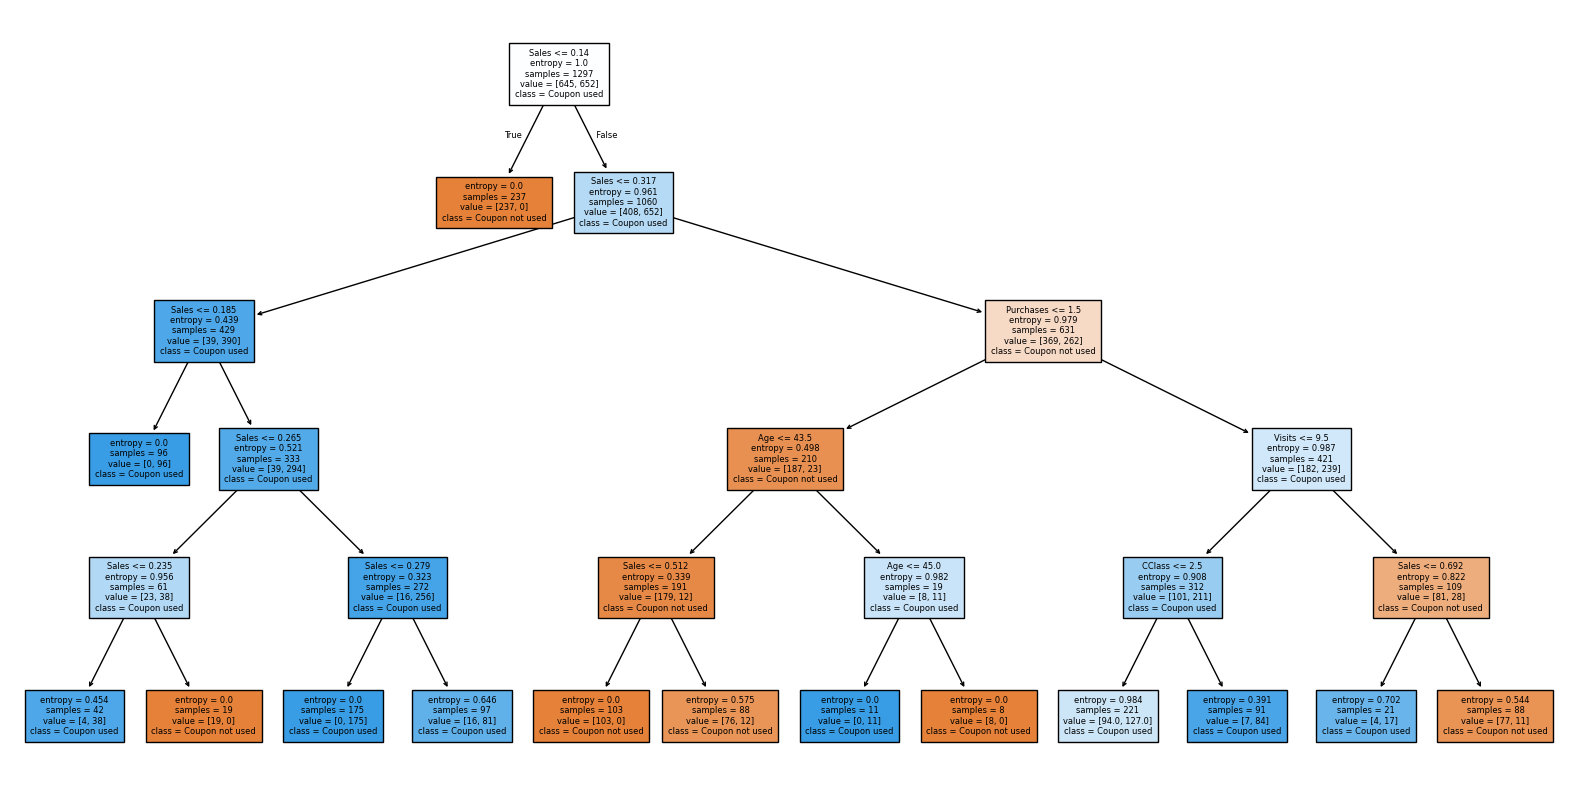

In [28]:
plt.figure(figsize = (20,10))
plot_tree(dtc_model, feature_names = vars, fontsize=6, class_names=cn, filled=True)
plt.show()

### 1. Evaluate Model
The model achieved an accuracy score of 0.885, meaning that approximately 88.5% of predictions were correct which is indicates that the model perfoms well overall.

### 2. Explain Model
The decision tree classifier used ID3 algorithm where the dependent variable was Coupon usage. I upsampled the data and the model was trained with a maximum depth of 5 as given in the instruction.

### 3. Explain Result
The resulting decision tree shows that Sales was the most influential factor in predicting coupon usage.

- When Sales ≤ 0.14, most customers did not use the coupon.
- However, when Sales ≤ 0.317 customers mostly used the coupon.
- Among these customers, Age also plays an important role — younger customers tend to not use coupons, while older customers or those with more stable purchasing habits are more likely to redeem coupons.

The tree’s leaf nodes show clear class separations, and most terminal nodes have low entropy, meaning the model makes confident classifications.